In [ ]:
######################################
### Sistemas Baseados em Conhecimento
### Notebook: N02 (Cadeia de Markov)   
######################################

#https://www.datacamp.com/tutorial/markov-chains-python-tutorial

from pomegranate import *

# Definicao da probabilidade inicial
start = DiscreteDistribution({
    "sun": 1.0,
    "rain": 0.0
})

# Definicao do modelo de transicao
transitions = ConditionalProbabilityTable([
    ["sun", "sun", 0.8],
    ["sun", "rain", 0.2],
    ["rain", "sun", 0.3],
    ["rain", "rain", 0.7]
], [start])

# Criar a cadeia de Markov
model = MarkovChain([start, transitions])

# Amostragem com 50 estados
print(model.sample(50))
print("---")
print(model.sample(50))


In [ ]:
### EXEMPLO 2

import numpy as np
import random as rm

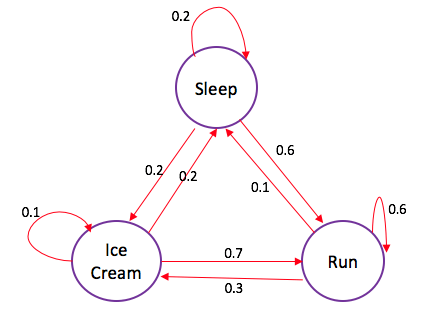

In [ ]:
# Espaco de estados
states = ["Sleep","Icecream","Run"]

# Possiveis sequencias de eventos
transitionName = [["SS","SR","SI"],["RS","RR","RI"],["IS","IR","II"]]

# Matrix de probabilidades/transicoes
transitionMatrix = [[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]


In [ ]:
# Verificar consistencia das matrizes

if sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[1]) != len(states):
    print("Check consistency")
else: print("Okay")


In [ ]:
# Implementacao de uma cadeia de Markov 

def activity_forecast(activityToday,days):
    # Arnazena a sequencia de estados (um para cada dia). Inicia com o estado (atividade) atual
    activityList = [activityToday]
    i = 0
    # Calcular a probabilidade das atividades
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1
    return activityList, prob

# Funcao que preve os estados possiveis para os proximos 2 dias

activityToday = "Sleep"
days = 2

print("Estado inicial: " + activityToday)
for _ in range(0,1):
    activityList, prob = activity_forecast(activityToday, days)
    print("Estados possiveis: " + str(activityList))
    print("Estado final apos "+ str(days) + " dias: " + activityToday)
    print("Probabilidade da sequencia de estados: " + str(prob))

    print("")


In [ ]:
#

list_activity = []
count = 0
total_iteractions = 1000

activityToday = "Sleep"
final_activity = "Run"
days = 2

# Gerar os 1000 samples
for iterations in range(1,total_iteractions):
    activityList, prob = activity_forecast(activityToday, days)
    list_activity.append(activityList)

# Contar todas os samples que acabam com o estado:'Run'
for smaller_list in list_activity:
    if(smaller_list[2] == final_activity):
        count += 1

# Calculate the probability of starting from state:'Sleep' and ending at state:'Run'
percentage = (count/total_iteractions) * 100
print("A probabilidade de iniciar no estado "+activityToday+" e finalizar no estado " + final_activity + " = " + str(percentage) + "%")